In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [2]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#data cleaning
df = titanic[['sex', 'pclass', 'age', 'survived']].dropna()
df["sex"] = df["sex"].map({'male': 0, 'female': 1})
df.head()

,sex,pclass,age,survived
0,0,3,22.0,0
1,1,1,38.0,1
2,1,3,26.0,1
3,1,1,35.0,1
4,0,3,35.0,0


In [4]:
x = df[['sex', 'pclass', 'age']]
y = df[['survived']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.80      0.78      0.79        87
           1       0.67      0.70      0.68        56

    accuracy                           0.75       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.75      0.75       143



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


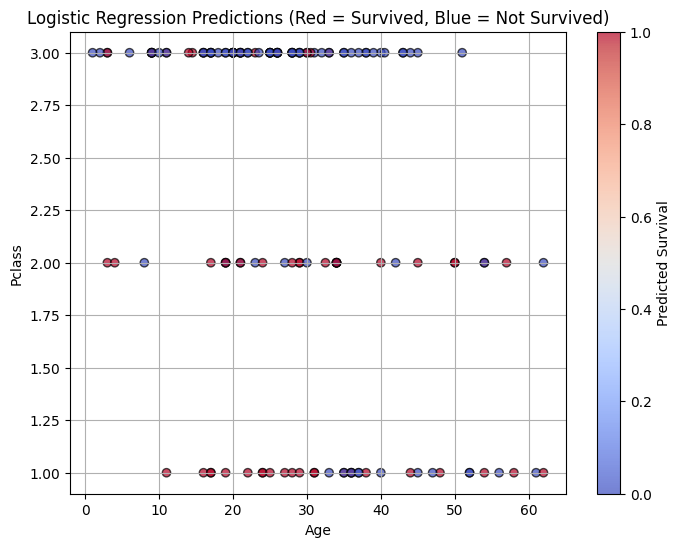

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(x_test['age'], x_test['pclass'], c=y_pred, cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.title('Logistic Regression Predictions (Red = Survived, Blue = Not Survived)')
plt.colorbar(label='Predicted Survival')
plt.grid(True)
plt.show()

In [6]:
probs = model.predict_proba(x_test)
print(probs[:5])

[[0.83834196 0.16165804]
 [0.49679603 0.50320397]
 [0.19167331 0.80832669]
 [0.0521254  0.9478746 ]
 [0.94965549 0.05034451]]
